## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu

In [2]:
Vx = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/full_rec/2k_rec', tiff = True).read_full()
Vp = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/full_rec/2k_seg', tiff = True).read_full()
# Vp_mask = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_y_surf', tiff = True).read_full()


##################################################
Found existing tiff folder: 2k_rec
Dataset shape: (2048, 2048, 2048)

##################################################
Found existing tiff folder: 2k_seg
Dataset shape: (2048, 2048, 2048)


In [3]:
pixel_res = 1.17 # micrometer per pixel
def transform_ax2(img):
    img = np.fliplr(img)
    img = np.rot90(img)
    return img
shading = 'copper'

In [4]:
imx = viewer.get_orthoplanes(vol = Vx)
imp = viewer.get_orthoplanes(vol = Vp)

(-0.5, 2047.5, 2047.5, -0.5)

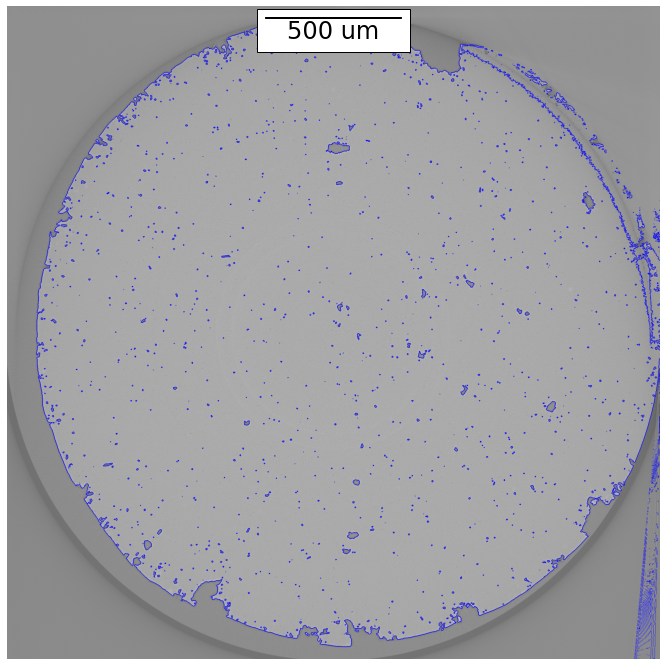

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0], imp[0], ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17, loc = 'upper center', fontsize = 24)
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

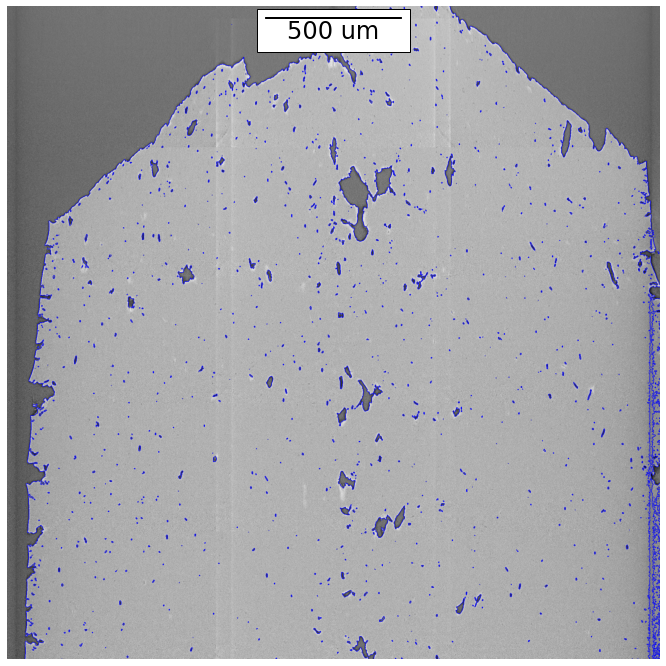

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1], imp[1], ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17, loc = 'upper center', fontsize = 24)
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

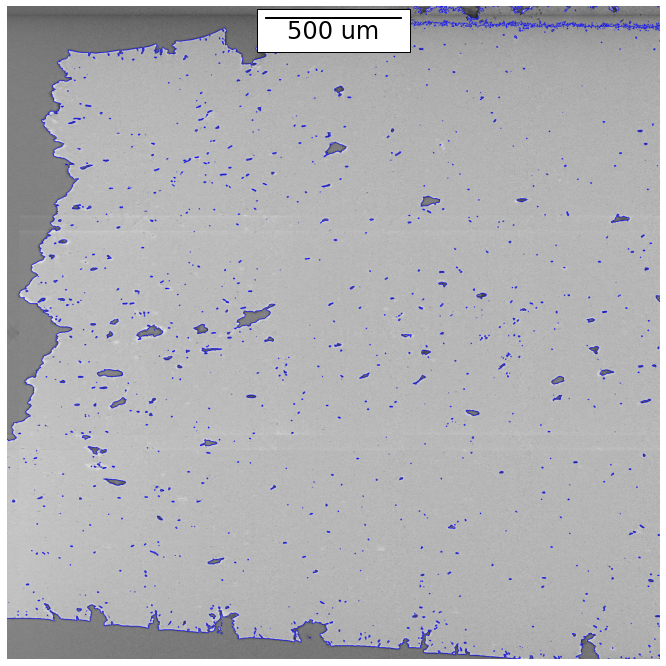

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2]), transform_ax2(imp[2]), ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17, loc = 'upper center', fontsize = 24)
ax.axis('off')